<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../../data/adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

In [3]:
print('Мужчин: {}'.format(data['sex'].value_counts().Male))
print('Женщин: {}'.format(data['sex'].value_counts().Female))

Мужчин: 21790
Женщин: 10771


**2. Каков средний возраст (признак age) женщин?**

In [4]:
print('Средний возраст женщин: {:.4f}'.format(data[data['sex'] == 'Female']['age'].mean()))

Средний возраст женщин: 36.8582


**3. Какова доля граждан Германии (признак native-country)?**

In [5]:
print('Доля граждан Германии: {:.4f} %'.format(len(data[data['native-country'] == 'Germany']) / len(data) * 100)) 

Доля граждан Германии: 0.4207 %


**4. Постройте гистограмму распределения (bar plot) образования людей (признак education).**

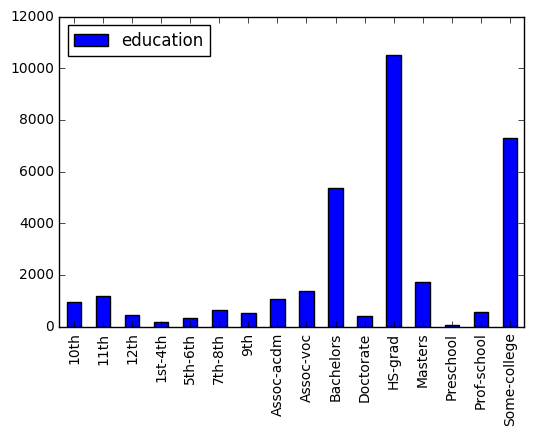

In [6]:
education_names = []
education_counts = []
for education, sub_df in data.groupby('education'):
    education_names.append(education)
    education_counts.append(len(sub_df))
help_df = pd.DataFrame({'education': education_counts},                      
                     index=education_names)
help_df.plot.bar()

**5. Каковы средние и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? **

In [7]:
print('Средний возраст тех, кто получает более 50К в год:                            {:.2f}'\
      .format(data[data['salary'] == '>50K']['age'].mean()))
print('Среднеквадратичное отклонения возраста тех, кто получает более 50К в год:     {:.2f}'\
      .format(data[data['salary'] == '>50K']['age'].std()))
print('Средний возраст тех, кто получает менее или 50К в год:                        {:.2f}'\
      .format(data[data['salary'] == '<=50K']['age'].mean()))
print('Среднеквадратичное отклонения возраста тех, кто получает менее или 50К в год: {:.2f}'\
      .format(data[data['salary'] == '<=50K']['age'].std()))

Средний возраст тех, кто получает более 50К в год:                            44.25
Среднеквадратичное отклонения возраста тех, кто получает более 50К в год:     10.52
Средний возраст тех, кто получает менее или 50К в год:                        36.78
Среднеквадратичное отклонения возраста тех, кто получает менее или 50К в год: 14.02


**6. Правда ли, что люди, которые получают больше 50k, имеют минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [8]:
high_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters' 'Doctorate']
data['high_education'] = data['education'].isin(high_education)
result = data[data['salary'] == '>50K']['high_education'].value_counts()
if result[True] ==  len(data):
    print('Правда!')
else:
    print('Неправда! Людей с высшим образованием: {}, без высшего образования: {}'.format(result[True], result[False]))


Неправда! Людей с высшим образованием: 3270, без высшего образования: 4571


**7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe.**

In [9]:
for i, sub_df in data.groupby(['race','sex']):
    print('Раса: {},\nПол: {}\nСтатистика возраста:\n{}\n'.format(i[0], i[1], sub_df['age'].describe()))

Раса: Amer-Indian-Eskimo,
Пол: Female
Статистика возраста:
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64

Раса: Amer-Indian-Eskimo,
Пол: Male
Статистика возраста:
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64

Раса: Asian-Pac-Islander,
Пол: Female
Статистика возраста:
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64

Раса: Asian-Pac-Islander,
Пол: Male
Статистика возраста:
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64

Раса: Black,
Пол: Fe

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)?**

In [10]:
'''
Never-married = Not-Married
Married-AF-spouse = Married
Married-civ-spouse = Married
Married-spouse-absent = Not-Married
Separated = Not-Married
Divorced = Not-Married
Widowed = Not-Married
'''
is_married_statuses = ['Married-AF-spouse', 'Married-civ-spouse']
rich_married = len(data[(data['marital-status'].isin(is_married_statuses))\
                        & (data['salary'] == '>50K')\
                        & (data['sex'] == 'Male')])
rich_not_married = len(data[(~data['marital-status'].isin(is_married_statuses))\
                            & (data['salary'] == '>50K')\
                            & (data['sex'] == 'Male')])
result = 'меньше'
if rich_married > rich_not_married:
    result = 'больше'
print('Доля зарабатывающих много женатых мужчин {} чем доля зарабатывающих много холостых мужчин.'\
     .format(result))

Доля зарабатывающих много женатых мужчин больше чем доля зарабатывающих много холостых мужчин.


**9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [11]:
max_hpw = data['hours-per-week'].max()
all_with_max_hpw = data[data['hours-per-week'] == max_hpw]
rich_with_max_hpw = all_with_max_hpw[all_with_max_hpw['salary'] == '>50K']
print('Максимальное количество часов в неделю:                        {}'.format(max_hpw))
print('Всего человек работают максимальное количество часов в неделю: {}'.format(len(all_with_max_hpw)))
print('Процент зарабатывающих много среди них:                        {:.4f}'\
      .format(len(rich_with_max_hpw) / len(all_with_max_hpw) * 100))

Максимальное количество часов в неделю:                        99
Всего человек работают максимальное количество часов в неделю: 85
Процент зарабатывающих много среди них:                        29.4118


**10. Посчитайте среднее время работы (hours-per-week) зарабатывающих много и мало (salary) для каждой страны (native-country).**

In [12]:
for i, sub_df in data.groupby('native-country'):
    mean_rich = sub_df[sub_df['salary'] == '>50K']['hours-per-week'].mean()
    mean_poor = sub_df[sub_df['salary'] == '<=50K']['hours-per-week'].mean()
    print('Страна: {}\n'.format(i) +
          '    среднее время работы зарабатывающих много: {:.4f}\n'.format(mean_rich) + \
          '    среднее время работы зарабатывающих мало:  {:.4f}\n'.format(mean_poor))

Страна: ?
    среднее время работы зарабатывающих много: 45.5479
    среднее время работы зарабатывающих мало:  40.1648

Страна: Cambodia
    среднее время работы зарабатывающих много: 40.0000
    среднее время работы зарабатывающих мало:  41.4167

Страна: Canada
    среднее время работы зарабатывающих много: 45.6410
    среднее время работы зарабатывающих мало:  37.9146

Страна: China
    среднее время работы зарабатывающих много: 38.9000
    среднее время работы зарабатывающих мало:  37.3818

Страна: Columbia
    среднее время работы зарабатывающих много: 50.0000
    среднее время работы зарабатывающих мало:  38.6842

Страна: Cuba
    среднее время работы зарабатывающих много: 42.4400
    среднее время работы зарабатывающих мало:  37.9857

Страна: Dominican-Republic
    среднее время работы зарабатывающих много: 47.0000
    среднее время работы зарабатывающих мало:  42.3382

Страна: Ecuador
    среднее время работы зарабатывающих много: 48.7500
    среднее время работы зарабатывающих

---

# Review

Отлично, оценка 10/10

---